In [ ]:
!pip install matplotlib
!pip install pandas
!pip install pandas_datareader
!pip install dataprep

from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/Shareddrives/Reto AI SEPTIMO"

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


!pip install seaborn
import seaborn as sns

data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [ ]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [ ]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

df = df.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

df = df.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [ ]:
df = [y for _, y in df.groupby('firm', as_index=False)]

In [ ]:
for i in range(len(df)):
  df[i]['lprice'] = df[i].groupby(['firm'])['adjprice'].shift(4)
  df[i]['r'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i]['lprice'].astype(np.float))
  df[i]['r2'] = np.log(df[i]['adjprice'].astype(np.float)) - np.log(df[i].groupby(['firm'])['adjprice'].shift(4).astype(np.float))
  df[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]
  #book firm value
  x = (df[i]['originalprice'].astype(np.float) * df[i]['sharesoutstanding'].astype(np.float) )
  #profit margin measures
  df[i]['operating_profit'] = (df[i]['revenue'].astype(np.float) - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float))
  df[i]['ebit'] = (df[i]['revenue'].astype(np.float)  - df[i]['cogs'].astype(np.float)  - df[i]['sgae'].astype(np.float)  - df[i]['otheropexp'].astype(np.float))
  df[i]['operating_profit_margin'] = (df[i]['ebit'].astype(np.float)  / df[i]['revenue'].astype(np.float) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

In [ ]:
for i in range(len(df)):
  df[i]['revenue'] = df[i]['revenue'].astype(np.float)
  df[i]['cogs'] = df[i]['cogs'].astype(np.float)
  df[i]['sgae'] = df[i]['sgae'].astype(np.float)
  df[i]['otheropexp'] = df[i]['otheropexp'].astype(np.float)
  df[i]['extraincome'] = df[i]['extraincome'].astype(np.float)
  df[i]['finexp'] = df[i]['finexp'].astype(np.float)
  df_Final4 = df[i].tail(4)

  temp = df[i].tail(1)


  total_assets = list(temp['totalassets'])[0]
  total_liabilities = list(temp['totalliabilities'])[0]
  short_debt = list(temp['shortdebt'])[0]
  long_debt = list(temp['longdebt'])[0]
  stockholder_equity = list(temp['stockholderequity'])[0]
  adj_price = list(temp['adjprice'])[0]
  original_price = list(temp['originalprice'])[0]
  book_value = list(temp['book_value'])[0]
  market_value = list(temp['market_value'])[0]
  operating_profit = list(temp['operating_profit'])[0]
  ebit = list(temp['ebit'])[0]
  operating_profit_margin = list(temp['operating_profit_margin'])[0]
  sharesout_standing = list(temp['sharesoutstanding'])[0]
  naics = list(temp['Sector NAICS\nlevel 1'])[0]
  name = list(temp['Name'])[0]
  newDF = df_Final4.groupby('firm', as_index = False).agg({'revenue':'sum','cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum'})

  newDF['totalassets'] = total_assets
  newDF['totalliabilities'] = total_liabilities
  newDF['shortdebt'] = short_debt
  newDF['longdebt'] = long_debt
  newDF['stockholderequity'] = stockholder_equity
  newDF['adjprice'] = adj_price
  newDF['originalprice'] = original_price
  newDF['sharesoutstanding'] = sharesout_standing
  newDF['book_value'] = book_value
  newDF['market_value'] = market_value
  newDF['operating_profit'] = operating_profit
  newDF['operating_profit_margin'] = operating_profit_margin
  newDF['ebit'] = ebit
  newDF['Sector NAICS\nlevel 1'] = naics
  newDF['Name'] = name

  df[i] = newDF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/

In [ ]:
mergedDF = pd.DataFrame()
for i in df:
  mergedDF = mergedDF.append(i, ignore_index = True)
mergedDF

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,totalassets,totalliabilities,shortdebt,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,10455000,5333000,175000,...,118.56,118.77,298708.056,5122000.000,3.547756e+07,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,15709000,8417000,1000,...,45.48795638,45.58,184448.686,7292000.000,8.407171e+06,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,1084755,871057,NaN,...,3.25,3.25,35016.392,213698.000,1.138033e+05,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,67963000,76385000,2106000,...,12.68,12.68,649514.848,-8422000.000,8.235848e+06,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,379274,270173,NaN,...,2.67,2.67,20398.497,109101.000,5.446399e+04,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,112738.0,25539.0,685.0,...,2.81,2.81,67209.461,87199.000,1.888586e+05,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3555,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,85433.0,78828.0,0.0,...,0.9701,0.9701,34095.968,6605.000,3.307650e+04,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3556,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,1176300.0,946900.0,5600.0,...,27.179735,27.24,125967.533,229400.000,3.431356e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3557,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,470968.0,234345.0,7900.0,...,1.23,1.23,103140.755,236623.000,1.268631e+05,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


# Specific questions:

## 2.2.1 About descriptive statistics:

### **2.2**.1.1 Considering the most recent financial quarter

#### Show how many firms by industry there are in the sample

In [ ]:
#d f.nunique()
mergedDF.groupby('Sector NAICS\nlevel 1')["firm"].nunique()


Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 

#### For each industry (and for all industries), What can you say about the typical firm size in terms of market value and book value?, How much these variables change within each industry?, How firm size (in market value) is distributed?




In [ ]:
# Revision de nombre de las columnas para los siguientes comandos
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

In [ ]:
# Datos del Market Value de Cada Firma
mergedDF.groupby('firm')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.547756e+07,NaN,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07,3.547756e+07
AA,1.0,8.407171e+06,NaN,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06,8.407171e+06
AAIC,1.0,1.138033e+05,NaN,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05,1.138033e+05
AAL,1.0,8.235848e+06,NaN,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06,8.235848e+06
AAME,1.0,5.446399e+04,NaN,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04,5.446399e+04
...,...,...,...,...,...,...,...,...
ZVIA,1.0,1.888586e+05,NaN,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05,1.888586e+05
ZVO,1.0,3.307650e+04,NaN,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04,3.307650e+04
ZWS,1.0,3.431356e+06,NaN,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06,3.431356e+06


In [ ]:
# Datos del Market Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.693665e+06,2.506871e+07,1.104731e+04,2.792043e+05,1.474242e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,132.0,1.378746e+07,4.460524e+07,6.078575e+03,5.259900e+05,1.961411e+06,6.399546e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7.425361e+03,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.859302e+06,5.645182e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,697.0,8.332506e+06,2.906470e+07,9.530881e+03,3.555148e+05,1.253038e+06,4.744693e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,1.015306e+04,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

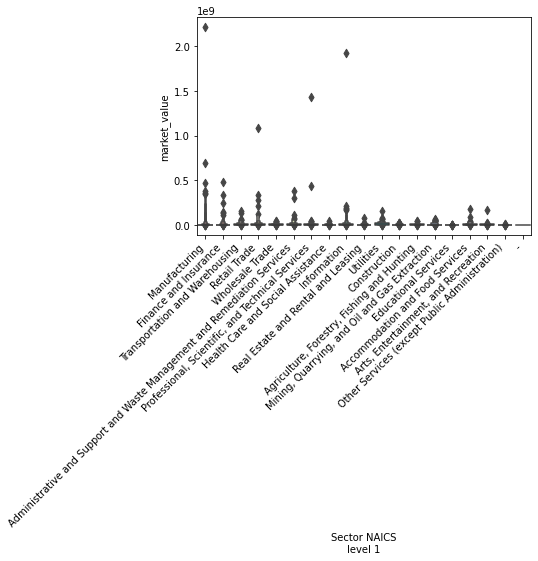

In [ ]:
#Market Value
#barplot
sns.boxenplot(x='Sector NAICS\nlevel 1', y='market_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")

In [ ]:
#Market Value median

mergedDF['market_value'].median()

1105860.1742999998

In [ ]:
mergedDF['market_value'].describe()

count    3.559000e+03
mean     1.096046e+07
std      6.622548e+07
min      3.490000e+01
25%      1.932212e+05
50%      1.105860e+06
75%      4.615835e+06
max      2.212838e+09
Name: market_value, dtype: float64

##### Respuesta (Valor de mercado)

Como podemos ver en la grafica de box plot en la mayorias de las industrias las firmas suelen tener un tamaño basado en valor de mercado muy similares entre firmas de la misma industria, por ejemplo en la construcción, en donde el rango de tamaño de las firmas se encuentra muy condensado.

En las industrias antes mencionadas podemos pensar que corresponden a los dos primeros cuartiles en general, como a su vez podemos considerar que las industrias de manofactura, finasas y el comercio minorista son los principales responsables de firmas dentro del tercer cuartil en genral.

Y si bien en un primer inicio podriamos considerar que los outlayers (firmas cuyo tamaño es anormalmente mas grandes que las mayoria de las firmas en las mismas industrias) corresponderian principalmente a las industrias con valor del tercer cuartil mas grande, en la realidad no es asi, ya que como podemos observar en la industrias de servicios tecnicos y de informacion hay firmas que son de las mas grandes en general.

In [ ]:
# Datos del Market Value de Cada Firma
mergedDF.groupby('firm')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,5122000.000,NaN,5122000.000,5122000.000,5122000.000,5122000.000,5122000.000
AA,1.0,7292000.000,NaN,7292000.000,7292000.000,7292000.000,7292000.000,7292000.000
AAIC,1.0,213698.000,NaN,213698.000,213698.000,213698.000,213698.000,213698.000
AAL,1.0,-8422000.000,NaN,-8422000.000,-8422000.000,-8422000.000,-8422000.000,-8422000.000
AAME,1.0,109101.000,NaN,109101.000,109101.000,109101.000,109101.000,109101.000
...,...,...,...,...,...,...,...,...
ZVIA,1.0,87199.000,NaN,87199.000,87199.000,87199.000,87199.000,87199.000
ZVO,1.0,6605.000,NaN,6605.000,6605.000,6605.000,6605.000,6605.000
ZWS,1.0,229400.000,NaN,229400.000,229400.000,229400.000,229400.000,229400.000


In [ ]:
# Datos del Book Value de Cada Sector
mergedDF.groupby('Sector NAICS\nlevel 1')['book_value'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.0,5704446.00,5704446.0
Accommodation and Food Services,69.0,5.019647e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Administrative and Support and Waste Management and Remediation Services,132.0,2.677850e+06,7.116921e+06,-1026446.0,8.216000e+04,525086.0,1871825.00,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1068506.5,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,76168.0,1678528.00,96433000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Finance and Insurance,697.0,5.269128e+06,2.022819e+07,-5438611.0,2.828350e+05,1010618.0,3259895.00,286143000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

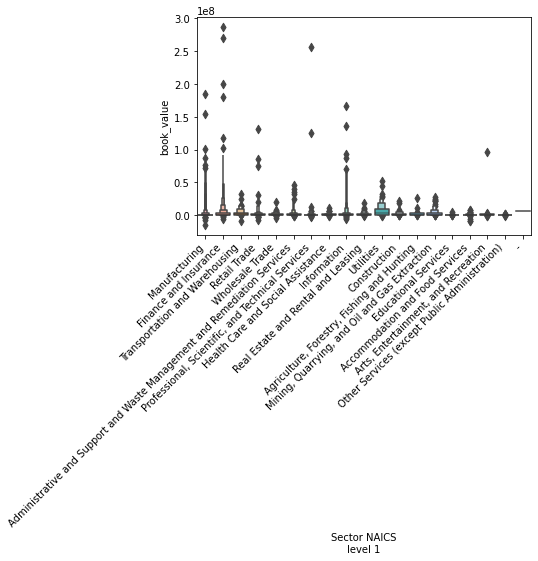

In [ ]:
#Book Value

sns.boxenplot(x='Sector NAICS\nlevel 1', y='book_value', data=mergedDF)
plt.xticks(rotation = 45, ha = "right")


In [ ]:
#Market Book Value

mergedDF['book_value'].median()

431283.0

In [ ]:
mergedDF['book_value'].describe()

count    3.559000e+03
mean     3.200436e+06
std      1.349909e+07
min     -1.479100e+07
25%      9.744857e+04
50%      4.312830e+05
75%      1.728704e+06
max      2.861430e+08
Name: book_value, dtype: float64

##### Respuesta (Valor de libro)

A diferencia del valor de mercado, podemos observar que el tamaño de las firmas en base a valor de libro suelen tener rangos mas diversos entre industrias, y que hay industrias que son mas grandes en base a valor de libro en comparacion a valor de mercado, siendo el principal exponente de este caso la industria de la informacion.

Algo que podemos observar es que igual que el tamaño en base a valor de libro hay outlayers en diversas industrian , incluso en aquellas que las que el tamaño de sus firmas suele estar en un rango bajo.



#### For each industry (and for all industries), what can you say about profit margin of firms? 

**show**

*   **a) descriptive statistics of profit margin and**
*   **b) plot(s) to illustrate how profit margin changes across industries.**

In [ ]:
mergedDF.columns

Index(['firm', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'book_value', 'market_value', 'operating_profit',
       'operating_profit_margin', 'ebit', 'Sector NAICS\nlevel 1', 'Name'],
      dtype='object')

In [ ]:
MesuresDF = mergedDF[['firm', 'revenue', 'cogs', 'sgae', 'ebit']]
MesuresDF

,firm,revenue,cogs,sgae,ebit
0,A,6527000.0,3004000.0,2.056000e+06,3.600000e+05
1,AA,13386000.0,9653000.0,8.930000e+05,7.320000e+05
2,AAIC,31855.0,15523.0,0.000000e+00,4.526000e+03
3,AAL,40717000.0,0.0,4.160800e+07,1.017000e+06
4,AAME,195299.0,0.0,1.915230e+05,-2.115000e+03
...,...,...,...,...,...
3554,ZVIA,156702.0,93921.0,8.744600e+04,-1.474300e+04
3555,ZVO,230001.0,149303.0,1.118000e+05,-8.410000e+02
3556,ZWS,340300.0,195100.0,1.196000e+05,5.350000e+04
3557,ZY,14546.0,48949.0,2.327660e+05,-1.061960e+05


In [ ]:
ProfitdDF = mergedDF[['firm', 'operating_profit', 'operating_profit_margin']]
ProfitdDF

,firm,operating_profit,operating_profit_margin
0,A,3.600000e+05,0.224020
1,AA,6.570000e+05,0.200878
2,AAIC,4.526000e+03,0.415229
3,AAL,1.017000e+06,0.075771
4,AAME,-2.115000e+03,-0.047348
...,...,...,...
3554,ZVIA,-6.700000e+03,-0.323723
3555,ZVO,-9.723000e+03,-0.016368
3556,ZWS,5.380000e+04,0.188248
3557,ZY,-6.573600e+04,-40.317388


In [ ]:
mergedDF.groupby('firm')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,3.600000e+05,NaN,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05,3.600000e+05
AA,1.0,6.570000e+05,NaN,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05,6.570000e+05
AAIC,1.0,4.526000e+03,NaN,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03,4.526000e+03
AAL,1.0,1.017000e+06,NaN,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06,1.017000e+06
AAME,1.0,-2.115000e+03,NaN,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03,-2.115000e+03
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-6.700000e+03,NaN,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03,-6.700000e+03
ZVO,1.0,-9.723000e+03,NaN,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03,-9.723000e+03
ZWS,1.0,5.380000e+04,NaN,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04,5.380000e+04


In [ ]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,126710.000000,NaN,126710.0,126710.000000,126710.000000,126710.00,126710.0
Accommodation and Food Services,69.0,235626.853177,6.324575e+05,-142000.0,5421.000000,38904.000000,157349.00,4004100.0
Administrative and Support and Waste Management and Remediation Services,132.0,163048.920693,4.942315e+05,-713000.0,95.500000,28169.000000,142138.50,4148000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,218999.116694,4.485638e+05,-18135.0,-1480.750000,19268.000000,160333.75,1616000.0
"Arts, Entertainment, and Recreation",21.0,206017.041144,5.320416e+05,-368756.0,4515.000000,54549.000000,178094.00,2390000.0
Construction,45.0,223408.468889,4.700429e+05,-90554.0,18727.000000,70000.000000,207221.00,2168200.0
Educational Services,14.0,14396.571429,5.877502e+04,-141260.0,371.000000,16561.500000,38039.50,126641.0
Finance and Insurance,697.0,262307.167099,1.119289e+06,-1315000.0,11680.000000,41290.000000,137300.00,15128000.0
Health Care and Social Assistance,64.0,72550.071519,3.089014e+05,-204471.0,-10986.250000,300.000000,62180.75,2264000.0


In [ ]:
mergedDF.groupby('firm')['operating_profit_margin'].describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,1.0,0.224020,NaN,0.224020,0.224020,0.224020,0.224020,0.224020
AA,1.0,0.200878,NaN,0.200878,0.200878,0.200878,0.200878,0.200878
AAIC,1.0,0.415229,NaN,0.415229,0.415229,0.415229,0.415229,0.415229
AAL,1.0,0.075771,NaN,0.075771,0.075771,0.075771,0.075771,0.075771
AAME,1.0,-0.047348,NaN,-0.047348,-0.047348,-0.047348,-0.047348,-0.047348
...,...,...,...,...,...,...,...,...
ZVIA,1.0,-0.323723,NaN,-0.323723,-0.323723,-0.323723,-0.323723,-0.323723
ZVO,1.0,-0.016368,NaN,-0.016368,-0.016368,-0.016368,-0.016368,-0.016368
ZWS,1.0,0.188248,NaN,0.188248,0.188248,0.188248,0.188248,0.188248


In [ ]:
mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.463653,NaN,0.463653,0.463653,0.463653,0.463653,0.463653
Accommodation and Food Services,69.0,0.100534,0.177755,-0.593442,0.022495,0.101864,0.185184,0.746437
Administrative and Support and Waste Management and Remediation Services,132.0,-2.271517,24.967468,-286.495298,-0.023688,0.065275,0.175726,0.975751
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.032423,0.289292,-0.980560,-0.067080,0.041809,0.105006,0.245713
"Arts, Entertainment, and Recreation",21.0,-0.002046,0.569222,-2.043234,0.045115,0.135304,0.276587,0.606817
Construction,45.0,0.099567,0.154027,-0.543047,0.037063,0.091377,0.180423,0.539738
Educational Services,14.0,-0.001653,0.296101,-0.944201,0.007309,0.039924,0.117768,0.328612
Finance and Insurance,696.0,-inf,NaN,-inf,0.187876,0.616043,0.926012,7.453061
Health Care and Social Assistance,64.0,-inf,NaN,-inf,-0.363581,-0.038219,0.088428,0.268134


In [ ]:
#mergedDF.groupby('Sector NAICS\nlevel 1')['operating_profit_margin']

!pip install plotly.express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fig1 =px.scatter(x=mergedDF['Sector NAICS\nlevel 1'], y=mergedDF['operating_profit_margin'], template='plotly_dark')

fig1.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

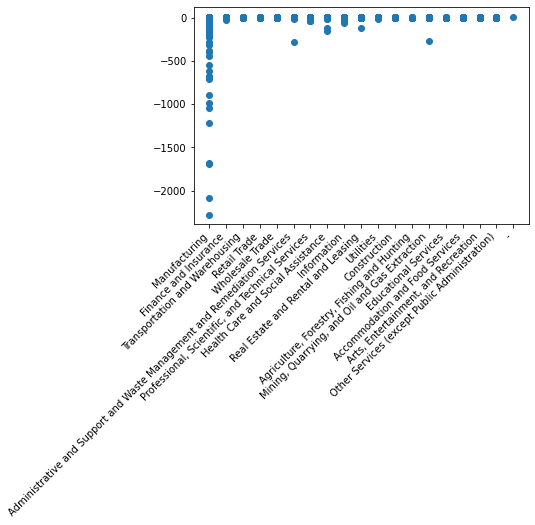

In [ ]:
plt.scatter(mergedDF['Sector NAICS\nlevel 1'], mergedDF['operating_profit_margin'])


plt.xticks(rotation = 45, ha = "right")

**Ploteo Genneral de todas las industrias con su debido Operating Profit Margin**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

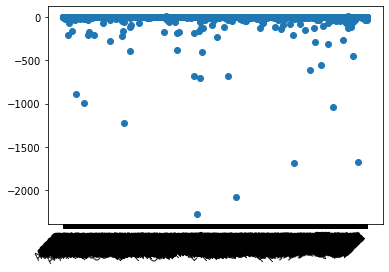

In [ ]:
plt.scatter(mergedDF['firm'], mergedDF['operating_profit_margin'])


plt.xticks(rotation = 45, ha = "right")

##### Respuesta

Podemos observar que para la mayoria de las industrias las empresas suelen obtener beneficios conservadores.


#### **Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?**


In [58]:
mergedDF['market_value'].mean()

10960461.118705181

In [57]:
mergedDF['market_value'].describe()

count    3.559000e+03
mean     1.096046e+07
std      6.622548e+07
min      3.490000e+01
25%      1.932212e+05
50%      1.105860e+06
75%      4.615835e+06
max      2.212838e+09
Name: market_value, dtype: float64

In [59]:
mergedDF['market_value'].nlargest(n=10)


8       2.212838e+09
2097    1.920840e+09
1379    1.435042e+09
200     1.080624e+09
3182    6.976698e+08
3263    4.818731e+08
1721    4.671001e+08
2001    4.363946e+08
2255    3.789750e+08
3300    3.743426e+08
Name: market_value, dtype: float64

In [62]:
mergedDF.loc[[8, 2097, 1379, 200, 3182, 3263, 1721, 2001, 2255, 3300],'firm']

8        AAPL
2097     MSFT
1379    GOOGL
200      AMZN
3182     TSLA
3263      UNH
1721      JNJ
2001     META
2255     NVDA
3300        V
Name: firm, dtype: object

##### Argumentacion

No solo podemos observar las 10 firmas mas grandes en termino de valor de mercado se encuentra muy por encima del promedio, sino tambien del tercer cuartil. Estando las segunda y tercera firma practicamente en a la par de la mas grande, mientras que las siete restantes le hace falta medio orden de magnitud para llegar al mismo orden de magnitud de la mas grande, lo cua podria parecer mucho, sin embargo estan dos orden de magnitud por encima del tercer cuartil, por lo que podriamos considerarlo como diferencia pequeña.

#### **Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?**

In [63]:
mergedDF['book_value'].mean()

3200436.1636636695

In [67]:
mergedDF['book_value'].describe()

count    3.559000e+03
mean     3.200436e+06
std      1.349909e+07
min     -1.479100e+07
25%      9.744857e+04
50%      4.312830e+05
75%      1.728704e+06
max      2.861430e+08
Name: book_value, dtype: float64

In [65]:
mergedDF['book_value'].nlargest(n=10)


1727    286143000.0
374     269118000.0
1379    255419000.0
545     199626000.0
3509    184508000.0
3430    179793000.0
2097    166542000.0
861     154562000.0
3050    135307000.0
200     131402000.0
Name: book_value, dtype: float64

In [66]:
mergedDF.loc[[1727, 374, 1379, 545, 3509, 3430, 2097, 861, 3050, 200],'firm']

1727      JPM
374       BAC
1379    GOOGL
545         C
3509      XOM
3430      WFC
2097     MSFT
861       CVX
3050        T
200      AMZN
Name: firm, dtype: object

##### Argumentacion

Podemos observar que las tres firmas mas grandes poseen tamaños en base al valor de libro muy similares. Y que asu vez nuevamente las diez firmas mas grandes se encuentra muy alejadas del tercer cuartil.

### 2.2.1.2 Considering the whole history of financial data for all firms:    

In [68]:
dataExtra = pd.read_csv('us2022q2a.csv')
df1Extra = pd.read_csv('us2022q2a.csv',names = dataExtra.columns)
df1Extra

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.76167023,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.2156075,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.00323786,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.56684082,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1


In [69]:
dataExtra = pd.read_csv('usfirms2022.csv')
df2Extra = pd.read_csv('usfirms2022.csv', names = dataExtra.columns)
df2Extra = df2Extra[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2Extra

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [70]:
dfExtra = pd.merge(df1Extra, df2Extra, left_on='firm', right_on="Ticker")
dfExtra = dfExtra.drop(columns=['Ticker'])
dfExtra = dfExtra.drop(dfExtra[dfExtra.firm.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.revenue.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.cogs.isnull()].index)
dfExtra = dfExtra.drop(dfExtra[dfExtra.adjprice.isnull()].index)
dfExtra

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing



#### **How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics**



In [71]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

# Print dfFly para observar si las nuevas columnas de BookValue y MarkertValue fueron creados de manera correcta
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,45.2156075,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,30.00323786,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,33.56684082,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,18.84034709,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,19.92552195,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970


In [72]:
#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))
dfExtra 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,30.72999954,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,5.29,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,4.24,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,2.88,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,2.05,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904


In [73]:
dfExtra.groupby('firm')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.288494,0.120793,0.103716,0.217904,0.268915,0.343811,0.820484
AA,23.0,1.355959,0.971442,0.374854,0.809227,1.170410,1.495281,5.074055
AAIC,77.0,1.228171,0.552571,0.373104,0.941506,1.158641,1.481687,3.822178
AAL,35.0,-0.144885,0.382663,-1.022603,-0.514931,-0.001517,0.153169,0.263440
AAME,44.0,1.795551,0.629087,0.999613,1.323642,1.634052,2.083773,3.662740
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.286999,0.133422,0.148602,0.209419,0.268839,0.346420,0.461716
ZVO,44.0,0.720074,0.399884,0.199689,0.453955,0.653621,0.883630,2.098072
ZWS,41.0,0.300945,0.126009,0.028616,0.205552,0.293488,0.395857,0.503355


In [74]:
Sample1dDF = dfExtra[['firm', 'BookToMarketRatio']]
Sample1dDF

,firm,BookToMarketRatio
1,A,0.139169
2,A,0.221116
3,A,0.210718
4,A,0.394756
5,A,0.378058
...,...,...
323811,ZYNE,0.401883
323812,ZYNE,0.449880
323813,ZYNE,0.597384
323814,ZYNE,0.748904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c2f853e90>,
      dtype=object)

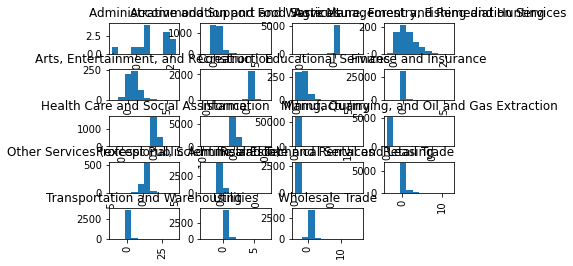

In [75]:
dfExtra.hist(column='BookToMarketRatio', by='Sector NAICS\nlevel 1')

In [76]:
#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,41251.537,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,41251.537,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,41217.537,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,42447.037,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830


In [77]:
dfExtra.groupby('firm')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.050791,0.055500,0.000000,0.021751,0.032594,0.059510,0.243941
AA,23.0,0.002537,0.010334,0.000063,0.000067,0.000075,0.000897,0.049896
AAIC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,35.0,0.041839,0.008872,0.027463,0.034723,0.039021,0.047526,0.060055
AAME,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.004057,0.001929,0.001888,0.002754,0.004131,0.005434,0.006076
ZVO,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZWS,41.0,0.007086,0.010558,0.000060,0.000678,0.004854,0.008571,0.062583


In [78]:
Sample2dDF = dfExtra[['firm', 'ShortFinancialLeverage']]
Sample2dDF

,firm,ShortFinancialLeverage
1,A,0.069936
2,A,0.067459
3,A,0.098516
4,A,0.060382
5,A,0.085132
...,...,...
323811,ZYNE,0.002100
323812,ZYNE,0.002307
323813,ZYNE,0.002576
323814,ZYNE,0.002830


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c24f0bf10>,
      dtype=object)

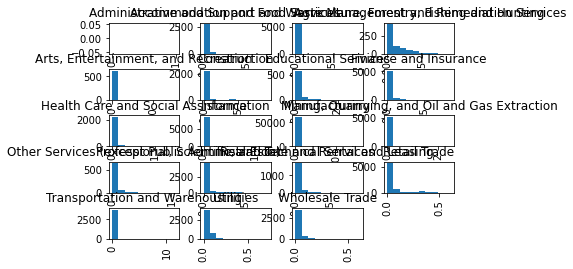

In [79]:
dfExtra.hist(column='ShortFinancialLeverage', by='Sector NAICS\nlevel 1')

In [80]:
#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )
dfExtra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,6,2000,2,"Agilent Technologies, Inc",Manufacturing,3.335506e+07,4642000.000,0.139169,0.069936,0.000000
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,9,2000,3,"Agilent Technologies, Inc",Manufacturing,2.216940e+07,4902000.000,0.221116,0.067459,0.000000
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,12,2000,4,"Agilent Technologies, Inc",Manufacturing,2.498606e+07,5265000.000,0.210718,0.098516,0.000000
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,3,2001,1,"Agilent Technologies, Inc",Manufacturing,1.403653e+07,5541000.000,0.394756,0.060382,0.000000
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,6,2001,2,"Agilent Technologies, Inc",Manufacturing,1.485486e+07,5616000.000,0.378058,0.085132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,6.0,2021,2,"Zynerba Pharmaceuticals, Inc",Manufacturing,2.182206e+05,87699.257,0.401883,0.002100,0.004770
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,9.0,2021,3,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.749065e+05,78686.999,0.449880,0.002307,0.004569
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,12.0,2021,4,"Zynerba Pharmaceuticals, Inc",Manufacturing,1.187065e+05,70913.334,0.597384,0.002576,0.004357
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,3.0,2022,1,"Zynerba Pharmaceuticals, Inc",Manufacturing,8.701643e+04,65166.970,0.748904,0.002830,0.003976


In [81]:
dfExtra.groupby('firm')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.193547,0.076053,0.000000,0.171441,0.206944,0.238204,0.381503
AA,23.0,0.116602,0.027216,0.079555,0.096540,0.114875,0.127486,0.178105
AAIC,78.0,0.044300,0.052730,0.000979,0.015593,0.018735,0.057950,0.206888
AAL,35.0,0.416729,0.063125,0.339314,0.360731,0.413919,0.441616,0.542572
AAME,45.0,0.107555,0.018407,0.083265,0.090759,0.104938,0.128502,0.150019
...,...,...,...,...,...,...,...,...
ZVIA,4.0,0.001865,0.002161,0.000008,0.000025,0.001647,0.003487,0.004155
ZVO,45.0,0.000712,0.004776,0.000000,0.000000,0.000000,0.000000,0.032038
ZWS,41.0,0.479835,0.102009,0.322382,0.385156,0.465212,0.574085,0.631874


In [82]:
Sample3dDF = dfExtra[['firm', 'LongFinancialLeverage']]
Sample3dDF

,firm,LongFinancialLeverage
1,A,0.000000
2,A,0.000000
3,A,0.000000
4,A,0.000000
5,A,0.000000
...,...,...
323811,ZYNE,0.004770
323812,ZYNE,0.004569
323813,ZYNE,0.004357
323814,ZYNE,0.003976


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c24c0f050>,
      dtype=object)

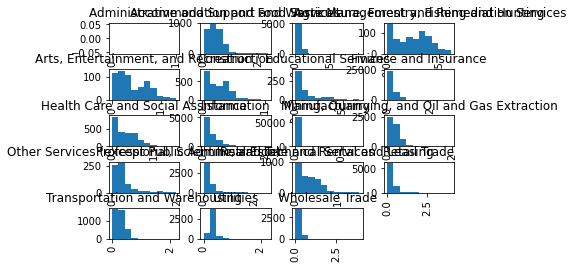

In [83]:
dfExtra.hist(column='LongFinancialLeverage', by='Sector NAICS\nlevel 1')

##### Argumentacion

- La relacion del valor neto de la firma entre el valor de mercado de la misma.

  Una firma cuya relacion tienda a uno signifiacria que el mercado no considera que el valor que genera sea significativo, por lo que la mayoria del valor de la firma en el mercado provendria de los activos que posee.

- La relacion entre la deuda a corto plazo y el total de activos.

- La relacion entre la deuda a largo plazo y el total de activos.

  La relacion de deuda entre los activos nos podria indicar la relacion entre la inversion que ha realizado la firma y cuanto ha recuperado, siendo una relacion que tiende a uno una firma cuya deuda sigue estando en los activos y que todavia no ha logrado subyacerla. Y dependiendo de si es deuda a corto o largo plazo nos podriamos dar una idea de en que rango de tiempo podria ser redituable.


#### Calculate and explain earnings per share deflated by price.

In [84]:
dfExtra.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage'],
      dtype='object')

In [85]:
#EPS = netincome / #SharesOutstanding
#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome

dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))

dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

dfExtra['EPS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



1         0.367036
2         0.342152
3         0.668323
4         0.337150
5         0.210032
            ...   
323811   -0.241205
323812   -0.256530
323813   -0.213867
323814   -0.200029
323815   -0.226007
Name: EPS, Length: 153245, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

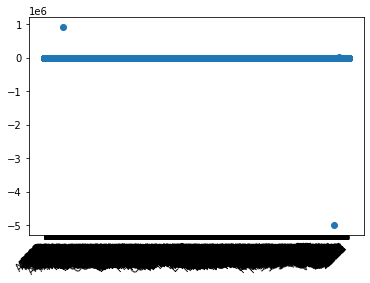

In [86]:
plt.scatter(dfExtra['firm'], dfExtra['EPS'])

plt.xticks(rotation = 45, ha = "right")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

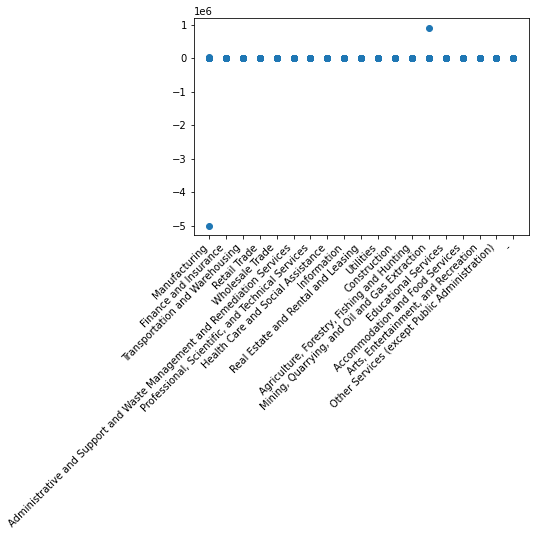

In [87]:
plt.scatter(dfExtra['Sector NAICS\nlevel 1'], dfExtra['EPS'])

plt.xticks(rotation = 45, ha = "right")

In [88]:
dfExtra.groupby('firm')['EPS'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.420154,0.882221,-3.272292,0.212429,0.440763,0.636054,6.500151
AA,23.0,0.107468,1.385143,-2.166711,-1.059465,0.230570,0.872640,2.976438
AAIC,77.0,0.148678,1.799500,-2.562073,-0.202300,0.192839,0.547008,13.361668
AAL,35.0,-0.058771,2.753022,-9.438679,0.145322,0.740485,1.294718,5.205247
AAME,44.0,0.055248,0.145597,-0.395677,0.011156,0.045079,0.099880,0.580378
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.260217,0.116521,-0.400173,-0.334244,-0.238637,-0.164610,-0.163422
ZVO,44.0,-0.044586,0.498383,-1.778515,-0.218795,-0.011200,0.214259,0.905355
ZWS,41.0,0.202404,0.292077,-0.596276,0.119546,0.243112,0.367039,0.785181


In [89]:
sorted_df = dfExtra.sort_values(by=['EPS'], ascending=False)
sorted_df.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
19973,APA,2022q2,3052000,0,1529000,0,-226000,0,394000,13839000,...,2,Apache Corp,"Mining, Quarrying, and Oil and Gas Extraction",3.490000e+01,2490000.0,71346.704871,0.009032,0.352988,903000.0,903000.000000
313754,WLK,2004q3,572031.0,487520.0,15055.0,516.0,-12884.0,10144.0,17595.0,1505866.0,...,3,Westlake Corp,Manufacturing,2.486450e+01,722938.0,29075.107080,0.000797,0.230558,28317.0,25396.412556
256495,SEB,2020q4,1990000.0,1760000.0,88000.0,0.0,124000.0,-3000.0,4000.0,6399000.0,...,4,Seaboard Corp,Wholesale Trade,3.518321e+06,3828000.0,1.088019,0.060634,0.160181,265000.0,228.294964
316703,WTM,2021q4,944800.0,0.0,313300.0,0.0,-7200.0,0.0,-3300.0,7000700.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.059719e+06,3704700.0,1.210797,NaN,0.070036,627600.0,207.967998
316699,WTM,2020q4,520800.0,0.0,163500.0,0.0,14300.0,0.0,-117600.0,4831400.0,...,4,White Mountains Insurance Group Ltd,Finance and Insurance,3.104058e+06,3817900.0,1.229970,NaN,0.074285,489200.0,157.704147


##### Respuesta

Si bien es dificil decir si el comportamiento es similar entre la firmas y las industrias por el orden de magnitud, podiamos afirmar que los ingresos netos entre las unidades de stocks va acorde de lo que podriamos esperar.

En el caso de la industria de la manofactura tiene una relacion de perdida de ingresos netos entre las unidades de stocks que concuerdan con el comportamiento visto de la industria en los puntos anteriores

### 2.2.2 About statistical modeling

#### You have to select a group of firms according to their general industry classification:

- Manufacturing industries
- Commercial industries (retail and wholesale)
- Service industries
- Financial services

#### Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

- Do histograms for each factor/variables and interpret them

- Do plots to visualize the possible relationship each factor might have with the dependent variable.

- Show descriptive statistics of these factors

In [90]:
dfExtra.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
-                                                                              1
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     132
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        697
Health Care and Social Assistance                                             64
Information                                                                  260
Manufacturing                                                               1533
Mining, Quarrying, and Oil and Gas Extraction                                103
Other 

In [92]:
df_Financial = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Finance and Insurance')].copy()


df_Financial

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,cto,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS
192,AAIC,2003q1,49539,1646,0,0,-39327,0,2843,5501107,...,1,Arlington Asset Investment Corp,Finance and Insurance,NaN,1011647.0,NaN,NaN,0.000979,5723.0,NaN
193,AAIC,2003q2,148439,19721,0,0,-63765,0,6181,8755318,...,2,Arlington Asset Investment Corp,Finance and Insurance,1.861494e+06,1136093.0,0.610312,NaN,0.002914,58772.0,0.423071
194,AAIC,2003q3,184960,22972,0,0,-90544,0,14483,9217811,...,3,Arlington Asset Investment Corp,Finance and Insurance,2.416226e+06,1068153.0,0.442075,NaN,0.004949,56961.0,0.406658
195,AAIC,2003q4,245587,24656,0,0,-119889,0,21084,11333613,...,4,Arlington Asset Investment Corp,Finance and Insurance,3.844904e+06,1554339.0,0.404260,NaN,0.004781,79958.0,0.479968
196,AAIC,2004q1,253357,32066,0,0,-116762,0,14890,11806507,...,1,Arlington Asset Investment Corp,Finance and Insurance,4.517968e+06,1685673.0,0.373104,NaN,0.005508,89639.0,0.535497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322551,ZION,2021q2,570000.0,15000.0,0.0,0.0,-100000.0,0.0,101000.0,87208000.0,...,2,"Zions Bancorporation, National Association",Finance and Insurance,8.659293e+06,8033000.0,0.927674,NaN,0.014999,354000.0,2.160966
322552,ZION,2021q3,569000.0,14000.0,0.0,0.0,-244000.0,0.0,71000.0,88306000.0,...,3,"Zions Bancorporation, National Association",Finance and Insurance,1.003054e+07,7774000.0,0.775033,NaN,0.011551,240000.0,1.480837
322553,ZION,2021q4,566000.0,13000.0,0.0,0.0,-284000.0,0.0,56000.0,93200000.0,...,4,"Zions Bancorporation, National Association",Finance and Insurance,9.882232e+06,7463000.0,0.755194,NaN,0.010858,213000.0,1.361340
322554,ZION,2022q1,555000.0,11000.0,0.0,0.0,-289000.0,0.0,52000.0,91126000.0,...,1,"Zions Bancorporation, National Association",Finance and Insurance,9.937213e+06,6294000.0,0.633377,NaN,0.007561,203000.0,1.339277


In [93]:
df_Financial.groupby('Sector NAICS\nlevel 1')['firm'].nunique()

Sector NAICS\nlevel 1
Finance and Insurance    697
Name: firm, dtype: int64

In [94]:
df_Financial.columns

Index(['firm', 'q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome',
       'finexp', 'incometax', 'totalassets', 'totalliabilities', 'shortdebt',
       'longdebt', 'stockholderequity', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fiscalmonth', 'year', 'cto', 'Name',
       'Sector NAICS\nlevel 1', 'market_value', 'book_value',
       'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage',
       'netincome', 'EPS'],
      dtype='object')

In [95]:
#EPSP = EPS \ NetIncome('adjprice')

df_Financial = df_Financial.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.adjprice.astype(np.float) )

df_Financial

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,Sector NAICS\nlevel 1,market_value,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP
192,AAIC,2003q1,49539,1646,0,0,-39327,0,2843,5501107,...,Arlington Asset Investment Corp,Finance and Insurance,NaN,1011647.0,NaN,NaN,0.000979,5723.0,NaN,NaN
193,AAIC,2003q2,148439,19721,0,0,-63765,0,6181,8755318,...,Arlington Asset Investment Corp,Finance and Insurance,1.861494e+06,1136093.0,0.610312,NaN,0.002914,58772.0,0.423071,0.008789
194,AAIC,2003q3,184960,22972,0,0,-90544,0,14483,9217811,...,Arlington Asset Investment Corp,Finance and Insurance,2.416226e+06,1068153.0,0.442075,NaN,0.004949,56961.0,0.406658,0.006433
195,AAIC,2003q4,245587,24656,0,0,-119889,0,21084,11333613,...,Arlington Asset Investment Corp,Finance and Insurance,3.844904e+06,1554339.0,0.404260,NaN,0.004781,79958.0,0.479968,0.005593
196,AAIC,2004q1,253357,32066,0,0,-116762,0,14890,11806507,...,Arlington Asset Investment Corp,Finance and Insurance,4.517968e+06,1685673.0,0.373104,NaN,0.005508,89639.0,0.535497,0.005267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322551,ZION,2021q2,570000.0,15000.0,0.0,0.0,-100000.0,0.0,101000.0,87208000.0,...,"Zions Bancorporation, National Association",Finance and Insurance,8.659293e+06,8033000.0,0.927674,NaN,0.014999,354000.0,2.160966,0.042201
322552,ZION,2021q3,569000.0,14000.0,0.0,0.0,-244000.0,0.0,71000.0,88306000.0,...,"Zions Bancorporation, National Association",Finance and Insurance,1.003054e+07,7774000.0,0.775033,NaN,0.011551,240000.0,1.480837,0.024530
322553,ZION,2021q4,566000.0,13000.0,0.0,0.0,-284000.0,0.0,56000.0,93200000.0,...,"Zions Bancorporation, National Association",Finance and Insurance,9.882232e+06,7463000.0,0.755194,NaN,0.010858,213000.0,1.361340,0.021968
322554,ZION,2022q1,555000.0,11000.0,0.0,0.0,-289000.0,0.0,52000.0,91126000.0,...,"Zions Bancorporation, National Association",Finance and Insurance,9.937213e+06,6294000.0,0.633377,NaN,0.007561,203000.0,1.339277,0.020715


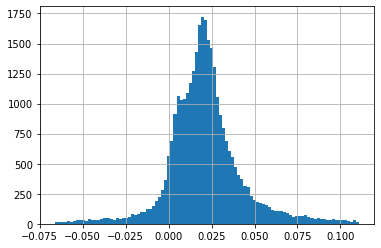

In [96]:
df_Financial[(df_Financial['EPSP'] < df_Financial['EPSP'].quantile(.975)) & (df_Financial['EPSP'] > df_Financial['EPSP'].quantile(.025))]['EPSP'].hist(bins=100)

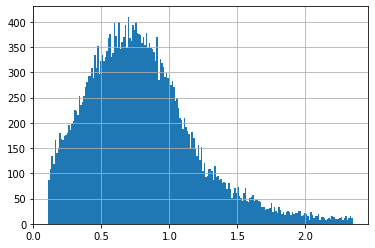

In [98]:
df_Financial[(df_Financial['BookToMarketRatio'] < df_Financial['BookToMarketRatio'].quantile(.975)) & (df_Financial['BookToMarketRatio'] > df_Financial['BookToMarketRatio'].quantile(.025))]['BookToMarketRatio'].hist(bins=200)

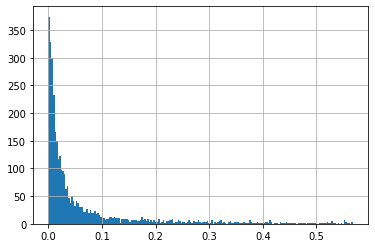

In [101]:
df_Financial[(df_Financial['ShortFinancialLeverage'] < df_Financial['ShortFinancialLeverage'].quantile(.975)) & (df_Financial['ShortFinancialLeverage'] > df_Financial['ShortFinancialLeverage'].quantile(.025))]['ShortFinancialLeverage'].hist(bins=200)

In [102]:
df_Financial['R'] = np.log(df_Financial['adjprice'].astype(np.float)) - np.log(df_Financial.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Financial['R']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



192            NaN
193            NaN
194            NaN
195            NaN
196       1.198789
            ...   
322551    0.472042
322552    0.778500
322553    0.399489
322554    0.200036
322555   -0.012988
Name: R, Length: 33626, dtype: float64

In [103]:
df_Financial['R'].isnull().sum()

2776

In [104]:
df_Financial['RNQ'] = df_Financial.groupby(['firm'])['R'].shift(-1)

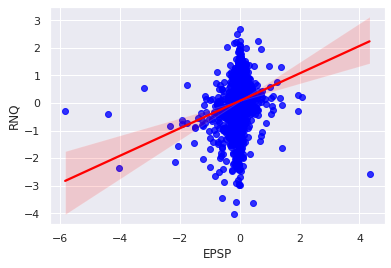

In [105]:
#df_Services.plot(kind = 'scatter', x = 'EPSP' , y = 'RNQ')

#plt.show() 

import seaborn as sns; sns.set_theme(color_codes=True)

x = sns.regplot(x="EPSP", y="RNQ", data=df_Financial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

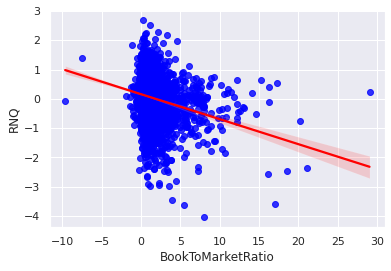

In [106]:
#df_Services.plot(kind = 'scatter', x = 'BookToMarketRatio', y = 'RNQ')

#plt.show() 

x = sns.regplot(x="BookToMarketRatio", y="RNQ", data=df_Financial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

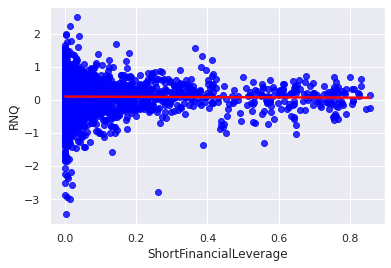

In [107]:
#df_Services.plot(kind = 'scatter', x = 'ShortFinancialLeverage', y = 'RNQ')

#plt.show()

x = sns.regplot(x="ShortFinancialLeverage", y="RNQ", data=df_Financial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

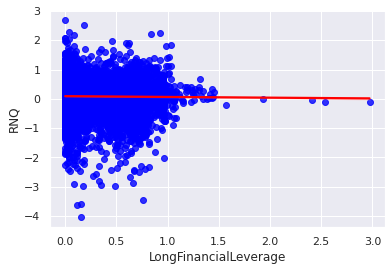

In [108]:
#df_Services.plot(kind = 'scatter', x = 'LongFinancialLeverage', y = 'RNQ')

#plt.show() 

#import seaborn as sns 
#sns.lmplot(x='LongFinancialLeverage',y='RNQ',data=df_Services,fit_reg=True)

x = sns.regplot(x="LongFinancialLeverage", y="RNQ", data=df_Financial, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [109]:
df_Financial.groupby('Sector NAICS\nlevel 1')['EPSP'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Finance and Insurance,33321.0,0.019034,0.104083,-5.833328,0.009118,0.020082,0.030932,4.336266


In [110]:
df_Financial.groupby('Sector NAICS\nlevel 1')['BookToMarketRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Finance and Insurance,33321.0,0.866387,0.822338,-9.643026,0.49503,0.751641,1.030383,29.056915


In [111]:
df_Financial.groupby('Sector NAICS\nlevel 1')['ShortFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Finance and Insurance,5965.0,0.054263,0.134316,0.0,0.0,0.004748,0.032055,0.855438


In [112]:
df_Financial.groupby('Sector NAICS\nlevel 1')['LongFinancialLeverage'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
Finance and Insurance,33626.0,0.195294,0.232862,0.0,0.02316,0.080744,0.36126,2.972546


#### Argumentacion

- EPSP

  Ya que una accion se podria ver mas atractiva a medida que tiene una relacion mas alta, ya que es un indicativo que que tanto se beneficia cada parte de la firma.

- La relacion entre el precio neto de la firma y el precio del mercado
  
  Podria influir en el rendimiento de las acciones, ya que es un indicativo de que tanto valor perciben los inversionista de la firma, ya que si consideraran que sus beneficios o su prevision a futuro no es buena no estarian dispuesto a pagar una accion mucho mas de lo que valen sus activos

- La relacion entre las deudas y los activos.

  Considero que podria influir ya que para el corto plazo podria ser un indicador de la salud de la firma, ya que de tener una relacion de deuda a corto plazo muy alta nos daria a entender de que no ha sido capaz de hacer frente a sus deudas con sus ingresos, mientras que para la deuda a largo plazo podria afectar al rendimiento futuro haciendo menos atractiva una accion si posee una deuda considerable, ya que si bien podriamos estimar si la firma seria capaz de pagarla a tiempo, la incertidumbre de que la situacion para la firma podria cambiar antes de liquidar su deuda podria reducir el interes por adquirir sus acciones.